In [34]:
import numpy as np
import matplotlib.pyplot as plt
import arviz as az 

In [35]:
# Set the style of the plots to a more beautiful format
az.style.use('arviz-whitegrid')

In [36]:
def logistic(r, x):
    return r * x * (1 - x)

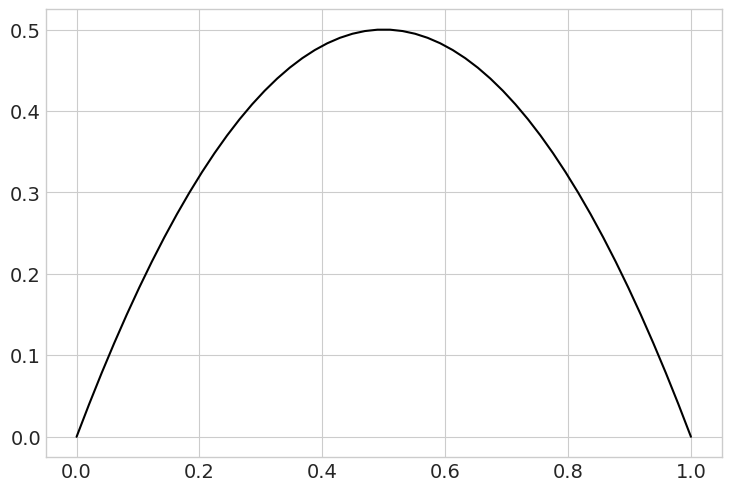

In [37]:
x = np.linspace(0, 1)
fig, ax = plt.subplots(1, 1)
ax.plot(x, logistic(2, x), 'k')

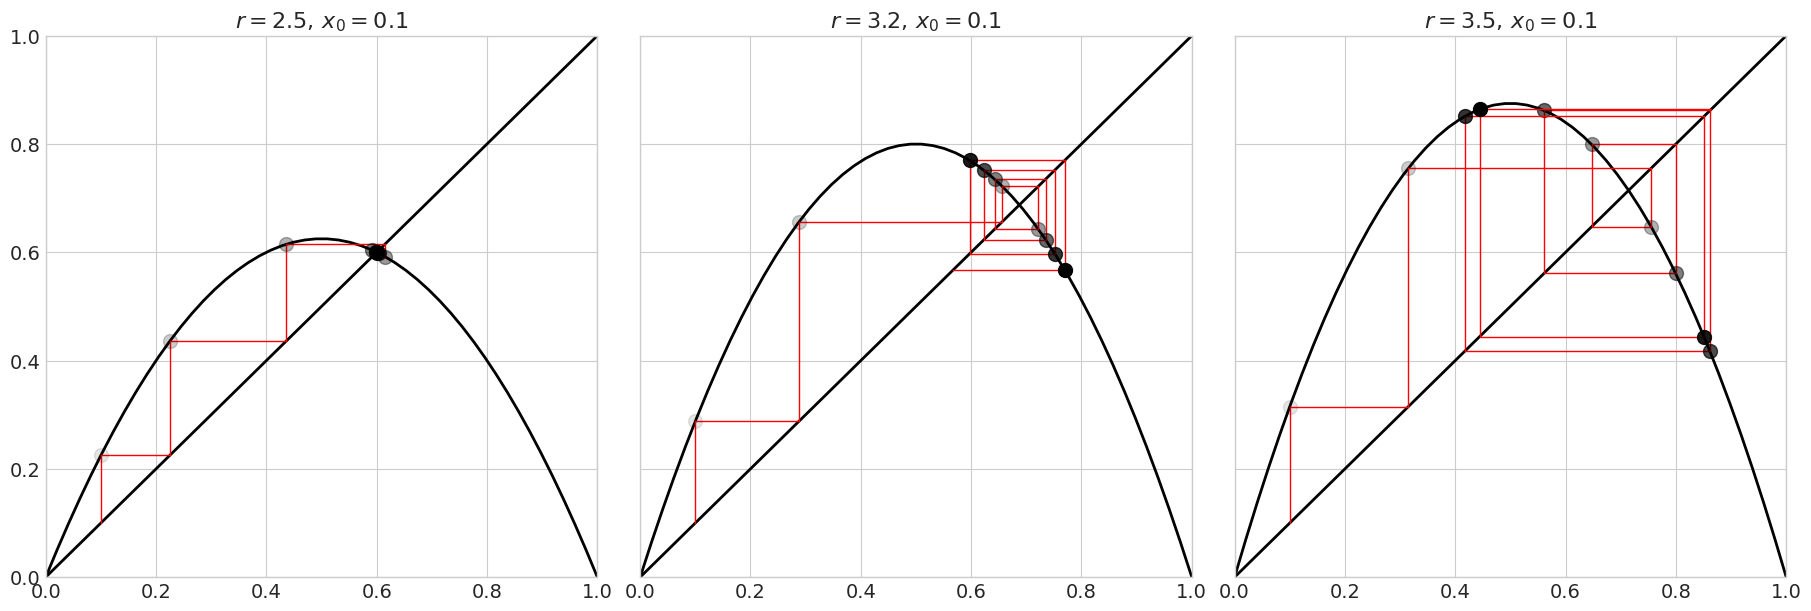

In [38]:
def plot_system(r, x0, n, ax=None):
    # Plot the function and the
    # y=x diagonal line.
    t = np.linspace(0, 1)
    ax.plot(t, logistic(r, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'k', lw=2)

    # Recursively apply y=f(x) and plot two lines:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    x = x0
    for i in range(n):
        y = logistic(r, x)
        # Plot the two lines.
        ax.plot([x, x], [x, y], 'r', lw=1)
        ax.plot([x, y], [y, y], 'r', lw=1)
        # Plot the positions with increasing
        # opacity.
        ax.plot([x], [y], 'ok', ms=10,
                alpha=(i + 1) / n)
        x = y

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6),
                               sharey=True)
plot_system(2.5, .1, 10, ax=ax1)
plot_system(3.2, .1, 10, ax=ax2)
plot_system(3.5, .1, 10, ax=ax3)

#plt.savefig('systemevolution.png')

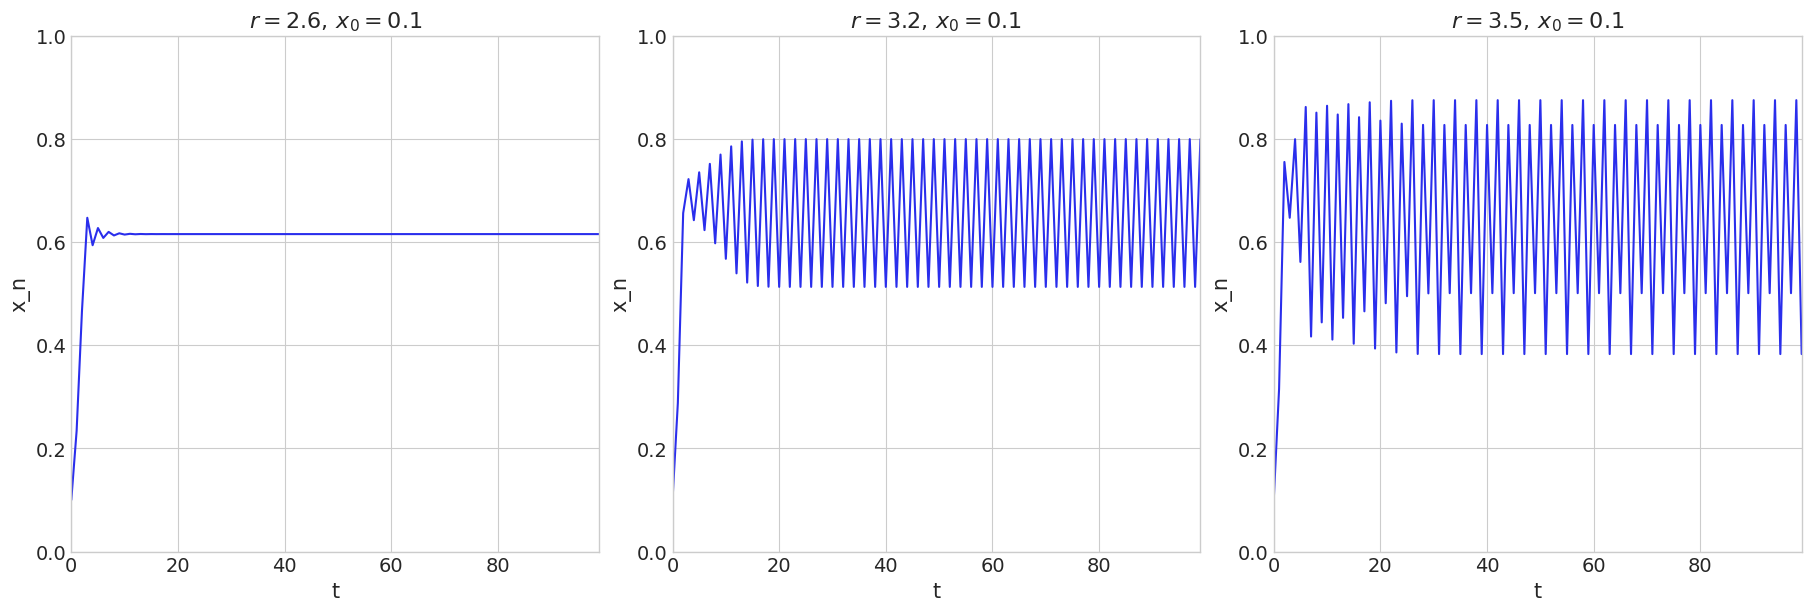

In [39]:
def plot_system2(r, x0, n, nskip=0, ax=None):
    # Plot the function and the
    # y=x diagonal line.
    #t = np.linspace(0, 1)
    x_T=[]
    T=[]
    t=0
    x = x0
    for i in range(n + nskip):
        if i >= nskip:
            x_T.append(x)
            T.append(t)
            t+=1
        x = logistic(r,x)

    ax.plot(T,x_T)
    ax.set_xlim(0, T[-1])
    ax.set_ylim(0, 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")

    ax.set_xlabel('t')
    ax.set_ylabel('x_n')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
plot_system2(2.6, .1, 100, ax=ax1)
plot_system2(3.2, .1, 100, ax=ax2)
plot_system2(3.5, .1, 100, ax=ax3)

In [40]:
# n values spaced equaly on 2.5 : 4 
n = 10000
r = np.linspace(2.5, 4.0, n)

# Transitory iterations and actual iterations
iterations = 1000
last = 100

In [41]:
# Initial cond
x = 1e-5 * np.ones(n)

# lyapunov initialization
lyapunov = np.zeros(n)

Text(0, 0.5, 'x')

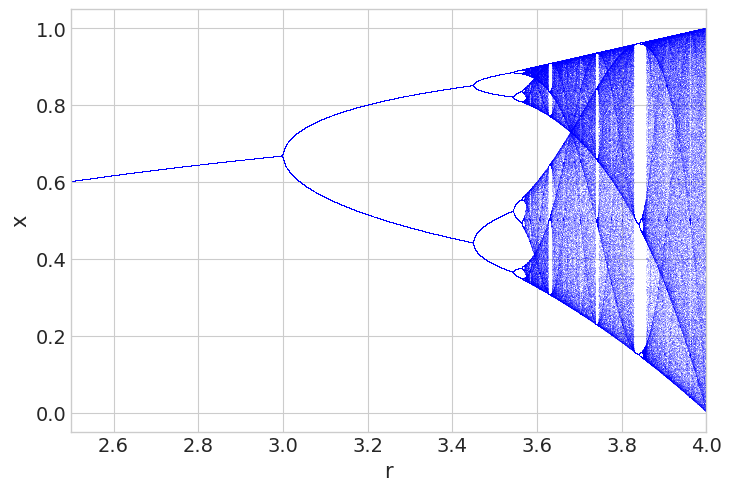

In [42]:
plt.figure()
for i in range(iterations):
    x = logistic(r, x)
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        plt.plot(r, x, ',b', alpha=.15)
plt.xlim(2.5, 4)
plt.xlabel('r')
plt.ylabel('x')
#plt.title("Bifurcation diagram")
#plt.savefig('logisticbifurcation.png')



Text(0.5, 1.0, 'Lyapunov exponent')

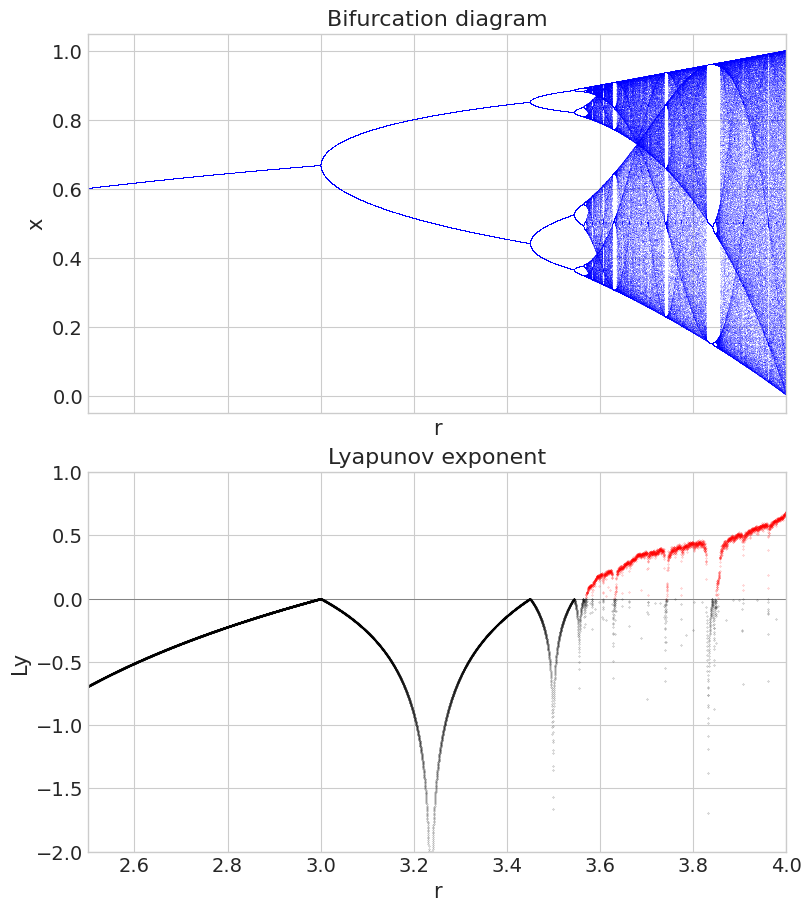

In [43]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9),
                               sharex=True)
for i in range(iterations):
    x = logistic(r, x)
    # We compute the partial sum of the
    # Lyapunov exponent Ly = ln (|xn'|)
    # xn = rx(1-x) = rx - rx^2
    # xn' = r - 2rx
    lyapunov += np.log(abs(r - 2 * r * x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',b', alpha=.15)
ax1.set_xlim(2.5, 4)
ax1.set_xlabel('r')
ax1.set_ylabel('x')
ax1.set_title("Bifurcation diagram")

# We display the Lyapunov exponent.
# Horizontal line.
ax2.axhline(0, color='k', lw=.5, alpha=.5)
# Negative Lyapunov exponent.
ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)
# Positive Lyapunov exponent.
ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5)
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-2, 1)
ax2.set_xlabel('r')
ax2.set_ylabel('Ly')
ax2.set_title("Lyapunov exponent")

#plt.savefig('logisticbifurcation_lyapunov.png')
